# Task 4: Restaurant Chains

## Objective:
1. **Identify if there are any restaurant chains present in the dataset**.
2. **Analyze the ratings and popularity of different restaurant chains**.

## Steps:

### 1. **Identify Restaurant Chains:**
   - Check if there is a column indicating the name or type of the restaurant chain (e.g., "Restaurant Name", "Chain Name").
   - Group the dataset by the restaurant chain or name and count the number of occurrences to identify chains with multiple entries.

### 2. **Data Inspection:**
   - Inspect columns like `Restaurant Name`, `Chain Name`, or any other identifier that might link restaurants to a chain.
   - Check if there are multiple locations for the same chain.

### 3. **Analyze Ratings:**
   - Look for a `Rating` or `Reviews` column in the dataset.
   - Calculate average ratings for each chain using group-by operations.
   - Visualize the ratings of chains with bar plots or boxplots.

### 4. **Analyze Popularity:**
   - Look for a `Popularity`, `Sales`, `Visits`, or similar metric that reflects how popular a restaurant chain is.
   - Use grouping and aggregation to identify the most popular chains based on this metric.
   - Plot the distribution of popularity metrics for comparison across chains.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
url = r"C:\Users\maren\Downloads\COGNIZFY DA Internship\LEVEL-2\Dataset .csv"
# Read the CSV file
df = pd.read_csv(url)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


1. **Identify if there are any restaurant chains present in the dataset**.

In [6]:
restaurant_chain= df.groupby("Restaurant Name").size().reset_index(name= "OutletCount")
new= restaurant_chain[restaurant_chain ["OutletCount"] > 1]
restaurant_chains=new.sort_values(by="OutletCount", ascending=False)



In [7]:
print(restaurant_chains[["Restaurant Name", "OutletCount"]].head(10))

       Restaurant Name  OutletCount
1098   Cafe Coffee Day           83
2098    Domino's Pizza           79
6106            Subway           63
2716  Green Chick Chop           51
4077        McDonald's           48
3478         Keventers           34
4961         Pizza Hut           30
2619             Giani           29
680     Baskin Robbins           28
663    Barbeque Nation           26


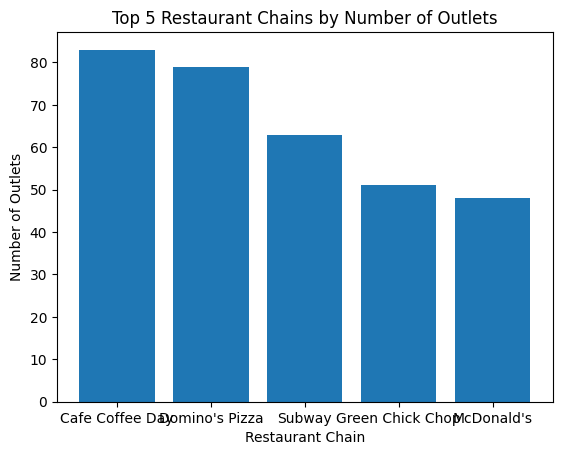

In [8]:
plt.bar(restaurant_chains["Restaurant Name"] [:5], restaurant_chains["OutletCount"][:5])
plt.xlabel("Restaurant Chain")
plt.ylabel("Number of Outlets")
plt.title("Top 5 Restaurant Chains by Number of Outlets")
plt.show()

2. **Analyze the ratings and popularity of different restaurant chains**.


In [16]:
ratings = df.groupby("Restaurant Name") ["Aggregate rating"].mean().reset_index(name="Average Rating").sort_values(by="Average Rating",ascending=False)
print(ratings)

                               Restaurant Name  Average Rating
5946                                    Solita             4.9
6045  Spiral - Sofitel Philippine Plaza Manila             4.9
2354                                 Flat Iron             4.9
5477                     Sagar Gaire Fast Food             4.9
651                                        Bao             4.9
...                                        ...             ...
5099                           Punjabi Special             0.0
7391                          Zaika Muradabadi             0.0
5097                Punjabi Shahi Chicken Soup             0.0
7388                          Zaika Kathi Roll             0.0
2425                            Food On Wheels             0.0

[7446 rows x 2 columns]


In [17]:
votes = df.groupby("Restaurant Name") ["Votes"].sum().reset_index(name="Total Votes").sort_values(by="Total Votes",ascending=False)
print(votes)

                 Restaurant Name  Total Votes
663              Barbeque Nation        28142
101    AB's - Absolute Barbecues        13400
6943                        Toit        10934
785                    Big Chill        10853
2297                  Farzi Cafe        10098
...                          ...          ...
2525  Frugurpop-  ibis New Delhi            0
2522               Frozen Grillz            0
953          Break Fast Junction            0
4959                   Pizza Hot            0
4949              Piyu Fast Food            0

[7446 rows x 2 columns]


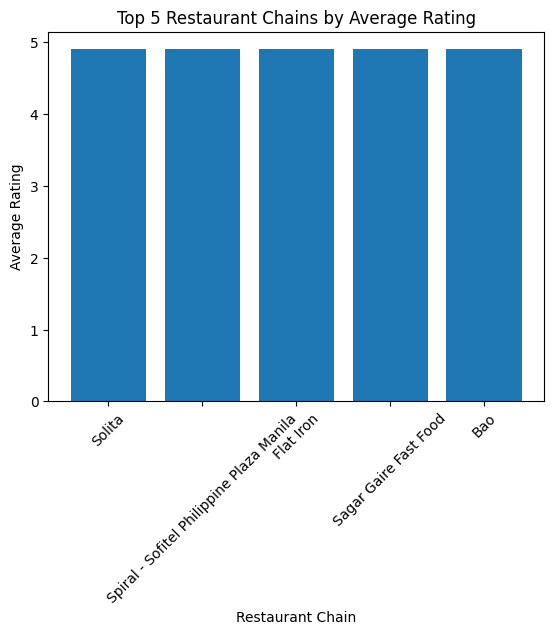

In [18]:
plt.bar(ratings["Restaurant Name"][:5],ratings["Average Rating"][:5])
plt.xlabel("Restaurant Chain")
plt.ylabel("Average Rating")
plt.title("Top 5 Restaurant Chains by Average Rating")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

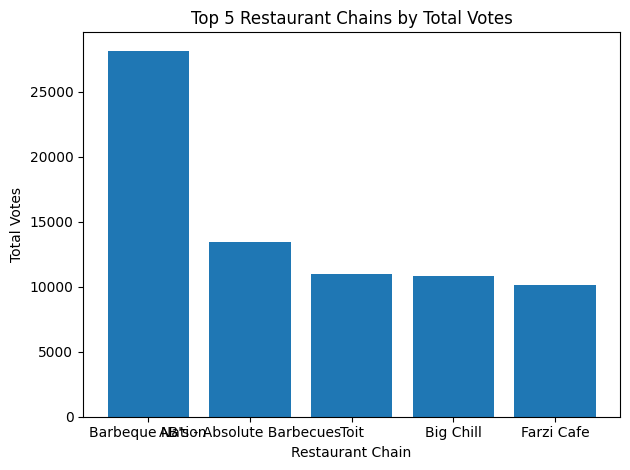

In [19]:
plt.bar(votes["Restaurant Name"][:5],votes["Total Votes"][:5])
plt.xlabel("Restaurant Chain")
plt.ylabel("Total Votes")
plt.title("Top 5 Restaurant Chains by Total Votes")
plt.tight_layout() 
plt.show()